### Load cleaned data and pre-defined classes

In [17]:
from data_clean import Data_to_Clean,Data_to_Analyze
import pickle
import os
import pandas as pd
import copy
import json
import logging
from tqdm.auto import tqdm
tqdm.pandas()

MBTI_types=[
    'istj', 'isfj', 'infj', 'intj', 
    'istp', 'isfp', 'infp', 'intp', 
    'estp', 'esfp', 'enfp', 'entp', 
    'estj', 'esfj', 'enfj', 'entj'
    ]
cleaned_data={T:None for T in MBTI_types}

for type in cleaned_data.keys():
    file_path=f"Data\\cleaned_data\\{type}_cleaned.pkl" 
    try:
        with open(file_path, 'rb') as f:
            cleaned_data[type] = pickle.load(f)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except pickle.UnpicklingError:
        print(f"Error: Could not unpickle the file {file_path}. It might be corrupted or not a valid pickle file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

In [18]:
infp=cleaned_data["infp"]
infp.data.loc[0,"posts"]

['forest',
 'elizabeth',
 'holly',
 'fuss',
 'fly',
 'seat',
 'pant',
 'best',
 'friend',
 'son',
 'day',
 'yes',
 'marry',
 'decoration',
 'flower',
 'old',
 'deal',
 'day',
 'list',
 'couple',
 'change',
 'easy',
 'thread',
 'present',
 'guess',
 'b',
 'incidentally',
 'word',
 'commonly',
 'gahenna',
 'ancient',
 'greek',
 'trash',
 'dump',
 'b',
 'set',
 'free',
 'yes',
 'albuquerque',
 'hometown',
 'fiesta',
 'trip',
 'worth',
 'chapter',
 'book',
 'acceptable',
 'commit',
 'book',
 'kid',
 'bring',
 'present',
 'ha',
 'boston',
 'creme',
 'donut',
 'soon',
 'hope',
 'celebrate',
 'birthday',
 'mind',
 'world',
 'cake',
 'donut',
 'kid',
 'hugo',
 'goat',
 'dog',
 'enjoy',
 'ray',
 'day',
 'anxiety',
 'sit',
 's',
 'sky',
 'wait',
 'color',
 'sunset',
 'sre',
 'warm',
 'color',
 'self',
 'criticism',
 'breathing',
 'meditation',
 'care',
 'time',
 'time',
 'way',
 'fine',
 'people',
 'appalachian',
 'healing',
 'recovery',
 'start',
 'relax',
 'home',
 'knit',
 'sweater',
 't',
 '

### Visualize VADER score of all MBTI types

In [19]:
mbti_identities={
    T:{
        k:cleaned_data[T].basic_identities[k]
        for k in [
        "ave_sentence_quantity",
        "ave_word_count",
        "ave_upper_ratio",
        "ave_reading_ease",
        "ave_GF_index"
        ]
    }
    for T in MBTI_types
}
mbti_identities=pd.DataFrame(mbti_identities).T
mbti_identities

ave_sentence_quantity  ave_word_count  ave_upper_ratio  \
istj             140.922780     1584.861004         0.125113   
isfj             139.890110     1542.766484         0.139261   
infj             136.120151     1662.837275         0.108945   
intj             142.160051     1768.897567         0.111903   
istp             142.599388     1439.327217         0.135959   
isfp             138.239782     1468.850136         0.147333   
infp             135.311232     1538.657566         0.133015   
intp             138.747226     1557.081381         0.124319   
estp             138.510000     1528.890000         0.144286   
esfp             147.137931     1500.454023         0.157108   
enfp             141.171468     1655.497942         0.136338   
entp             147.183709     1617.429809         0.125773   
estj             150.148148     1861.827160         0.099657   
esfj             139.666667     1571.104762         0.141718   
enfj             141.915058     1690.857143         0.119560   
entj             142.960573     1713.476703         0.116676   

      ave_reading_ease  ave_GF_index  
istj         53.508301     16.561120  
isfj         58.487995     14.762555  
infj         59.505421     14.098761  
intj         55.228515     15.652458  
istp         50.868624     18.008930  
isfp         51.682698     17.722262  
infp         54.009626     16.649938  
intp         50.273724     18.050296  
estp         54.100900     16.754100  
esfp         54.208218     16.571782  
enfp         55.011289     16.238724  
entp         48.465754     18.679307  
estj         55.780123     15.963333  
esfj         58.292857     15.020381  
enfj         56.535425     15.473456  
entj         55.087849     15.837384

In [20]:
all_vader_scores={T:cleaned_data[T].basic_identities["overall_vader_score"] for T in MBTI_types}

In [21]:
all_vader_scores=pd.DataFrame(all_vader_scores).T

In [22]:
all_vader_scores=all_vader_scores.sort_values(by="compound",ascending=False)
all_vader_scores

neg       neu       pos  compound
isfj  0.074714  0.706432  0.179305  0.156459
infj  0.077386  0.706724  0.171925  0.146350
enfj  0.077268  0.706996  0.172352  0.146079
estj  0.075952  0.715335  0.168221  0.135310
esfj  0.079053  0.708754  0.163387  0.126369
enfp  0.081753  0.717179  0.163048  0.125133
intj  0.078297  0.723588  0.157496  0.117230
infp  0.086349  0.708721  0.163746  0.113087
isfp  0.086260  0.709435  0.164908  0.108508
entj  0.082541  0.718532  0.157704  0.106751
istj  0.083894  0.722811  0.153920  0.099382
esfp  0.088280  0.716392  0.156600  0.093912
estp  0.086791  0.719593  0.150472  0.093669
intp  0.086243  0.720133  0.151148  0.090751
istp  0.089930  0.711712  0.150577  0.078989
entp  0.087409  0.723706  0.144536  0.076574

In [23]:
all_vader_scores["compound"].describe()

count    16.000000
mean      0.113410
std       0.024352
min       0.076574
25%       0.093851
50%       0.110797
75%       0.128604
max       0.156459
Name: compound, dtype: float64

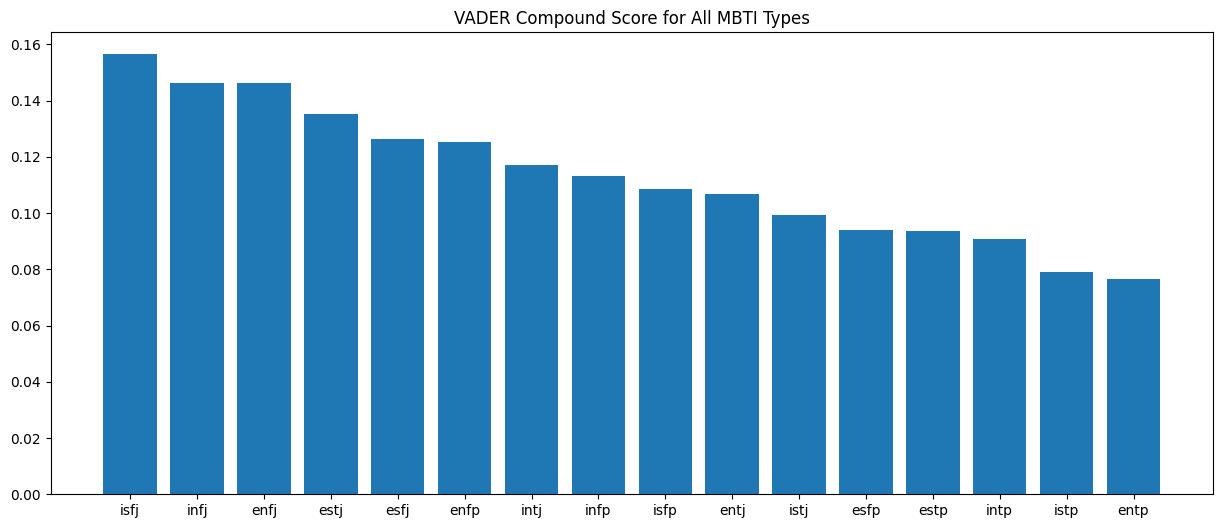

In [24]:
import matplotlib.pyplot as plt
x=all_vader_scores.index
y=all_vader_scores["compound"]
plt.figure(figsize=(15, 6))
plt.bar(x,y)
plt.title("VADER Compound Score for All MBTI Types")
plt.show()

In [25]:
# with open("Data/phrases.json",'r') as f:
#     phrases=json.load(f)
# phrases.keys()

In [26]:
# phrase_parts=set()
# for phrase in phrases.keys():
#     phrase_parts.update(phrase.split("_"))
# phrase_parts

### Construct a dictionary for LDA modeling

In [27]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
def constract_initial_dict(source,no_above,no_below):

    output = {T: {
        "original_text": [],
    } for T in MBTI_types}
    
    output["all_original_text"]=[]
    for T in tqdm(MBTI_types):
        for i in source[T].data.index:
            temp=source[T].data.loc[i,"posts"]
            output[T]["original_text"].append(temp)
        output["all_original_text"].extend(output[T]["original_text"])
    output["overall_dict"]=corpora.Dictionary(output["all_original_text"])
    output["overall_dict"].filter_extremes(no_above=no_above,no_below=no_below)
    output["overall_dict"].compactify()
    print("Size of dictionary:",len(output["overall_dict"]))
    output["all_corpus"]=[output["overall_dict"].doc2bow(post_token) for post_token in output["all_original_text"]]
    return output
initial_dict=constract_initial_dict(source=cleaned_data,
                                    no_above=0.2,
                                    no_below=50)
with open("Data/initial_dict.pkl",'wb') as f:
    pickle.dump(initial_dict,f)


  0%|          | 0/16 [00:00<?, ?it/s]

Size of dictionary: 5132


In [28]:
def check_corpus(corpus,dict,name=''):
    result=pd.DataFrame(
        [
            list(range(len(dict))),
            [0]*len(dict)
        ]
    ).T
    result.columns=["word","frequency"]
    for post in tqdm(corpus):
        for word_tuple in post:
            result.loc[word_tuple[0],"frequency"]+=word_tuple[1]
    for i in result.index:
        result.loc[i,"word"]=dict[i]
    result=result.sort_values(by="frequency",ascending=False)
    result.to_csv(f"Data/{name}id2word_result.csv")

In [29]:
check_corpus(initial_dict["all_corpus"],initial_dict["overall_dict"])

  0%|          | 0/7811 [00:00<?, ?it/s]

C:\Users\DominicMin\AppData\Local\Temp\ipykernel_54260\1204166519.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'acct' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[i,"word"]=dict[i]


In [30]:
initial_dict["overall_dict"][266]

'repost'

### Use LDA for topic modeling

In [31]:
with open("Data/initial_dict.pkl","rb") as f:
    initial_dict=pickle.load(f)
import gensim.corpora as corpora
import gensim
from gensim.models import LdaMulticore,CoherenceModel

def optimize_topic_num(
  start,
  end,
  step,
  dict=initial_dict["overall_dict"],
  corpus=initial_dict["all_corpus"],
  text=initial_dict["all_original_text"]      
):
  output=pd.Series({},dtype=float)
  topic_num_range=range(start, end+1, step)
  for topic_num in tqdm(topic_num_range, desc="计算全局模型主题数"):
  # 训练 LDA 模型 (在所有帖子数据上)
    temp_lda_model=LdaMulticore(
        corpus=corpus,    # 使用所有帖子的词袋语料
        id2word=dict,         # 使用全局词典
        num_topics=topic_num,
        random_state=100,
        chunksize=2603,
        passes=30,
        alpha="asymmetric",
        eta="auto", 
        per_word_topics=False,  
        workers=None                     
    )

    # Evaluate the model 
    temp_chmodel=CoherenceModel(
        model=temp_lda_model,
        texts=text,
        dictionary=dict,
        coherence="c_v"
    )
    output[topic_num]=temp_chmodel.get_coherence()
  print(output)
    

In [32]:
# 在较大范围内寻找最佳主题数
optimize_topic_num(19,24,1)

计算全局模型主题数:   0%|          | 0/6 [00:00<?, ?it/s]

19    0.476633
20    0.459177
21    0.452981
22    0.466755
23    0.470175
24    0.490247
dtype: float64


In [33]:
optimize_topic_num(25,26,1)

计算全局模型主题数:   0%|          | 0/2 [00:00<?, ?it/s]

25    0.475059
26    0.486034
dtype: float64


In [35]:
# Train the optimized final model with enhanced parameters for better convergence and topic separation
topics=24

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
# Optimized parameters for better convergence and topic distinction
lda_model = LdaMulticore(
    corpus=initial_dict["all_corpus"],
    id2word=initial_dict["overall_dict"],
    num_topics=topics,
    random_state=100,
    chunksize=100,           # 大幅减小：提高更新频率，改善收敛性
    passes=300,              # 适当减少：配合其他优化参数
    iterations=150,          # 新增：增加每个pass的迭代次数
    alpha=0.01,              # 从asymmetric改为小值：促进文档-主题稀疏性，提高主题区分度
    eta=0.01,                # 从auto改为小值：促进词汇-主题稀疏性，减少主题混杂
    decay=0.5,               # 新增：控制学习率衰减，改善收敛稳定性
    offset=1.0,              # 新增：学习率起始值         # 新增：每个chunk后更新模型
    minimum_probability=0.01, # 新增：过滤低概率主题分配
    per_word_topics=False,
    workers=None,               # 启用并行化加速训练
    eval_every=20            # 减少评估频率，降低计算开销
)

2025-06-08 17:56:39,341 - INFO - using serial LDA version on this node
2025-06-08 17:56:39,348 - INFO - running online LDA training, 24 topics, 300 passes over the supplied corpus of 7811 documents, updating every 2100 documents, evaluating every ~7811 documents, iterating 150x with a convergence threshold of 0.001000
2025-06-08 17:56:39,350 - INFO - training LDA model using 21 processes
2025-06-08 17:57:17,784 - INFO - PROGRESS: pass 0, dispatched chunk #0 = documents up to #100/7811, outstanding queue size 1
2025-06-08 17:57:17,787 - INFO - PROGRESS: pass 0, dispatched chunk #1 = documents up to #200/7811, outstanding queue size 2
2025-06-08 17:57:17,789 - INFO - PROGRESS: pass 0, dispatched chunk #2 = documents up to #300/7811, outstanding queue size 3
2025-06-08 17:57:17,791 - INFO - PROGRESS: pass 0, dispatched chunk #3 = documents up to #400/7811, outstanding queue size 4
2025-06-08 17:57:17,794 - INFO - PROGRESS: pass 0, dispatched chunk #4 = documents up to #500/7811, outstandi

In [36]:
# Model evaluation
chmodel = CoherenceModel(
        model=lda_model,
        texts=initial_dict["all_original_text"],
        dictionary=initial_dict["overall_dict"],
        coherence="c_v"
    )
cv=chmodel.get_coherence()
cv

2025-06-08 18:11:25,823 - INFO - using ParallelWordOccurrenceAccumulator<processes=21, batch_size=64> to estimate probabilities from sliding windows
2025-06-08 18:12:00,531 - INFO - 1 batches submitted to accumulate stats from 64 documents (19207 virtual)
2025-06-08 18:12:00,534 - INFO - 2 batches submitted to accumulate stats from 128 documents (36436 virtual)
2025-06-08 18:12:00,537 - INFO - 3 batches submitted to accumulate stats from 192 documents (50505 virtual)
2025-06-08 18:12:00,540 - INFO - 4 batches submitted to accumulate stats from 256 documents (69898 virtual)
2025-06-08 18:12:00,544 - INFO - 5 batches submitted to accumulate stats from 320 documents (88028 virtual)
2025-06-08 18:12:00,547 - INFO - 6 batches submitted to accumulate stats from 384 documents (104642 virtual)
2025-06-08 18:12:00,550 - INFO - 7 batches submitted to accumulate stats from 448 documents (119299 virtual)
2025-06-08 18:12:00,554 - INFO - 8 batches submitted to accumulate stats from 512 documents (1

0.522784382537091

In [37]:
# Create unique directories for each LDA model
# That's because all variables are unique for each LDA model due to different stopword set
model_id=f"{topics}_{str(cv)[2:6]}"
# Model ID are designed as "[number of topics]_[CV score]", is unique for each model

path=f"output/lda_model/lda_{model_id}"
if not os.path.exists(path):
    os.makedirs(path)

path=f"output/lda_model/lda_{model_id}/cleaned_data"
if not os.path.exists(path):
    os.makedirs(path)

path=f"output/lda_model/lda_{model_id}/visualization"
if not os.path.exists(path):
    os.makedirs(path)

# Save LDA model
with open(f"output/lda_model/lda_{model_id}/lda_{model_id}.pkl",'wb') as f:
    pickle.dump(lda_model,f)

# Save cleaned data
with open(f"output/lda_model/lda_{model_id}/cleaned_data/cleaned_data.pkl", "wb") as f:
    pickle.dump(cleaned_data,f)

# Save original text
with open(f"output/lda_model/lda_{model_id}/all_original_text.pkl","wb") as f:
        pickle.dump(initial_dict["all_original_text"],f)


In [39]:
# Get all topics words and weights
all_topics_words = lda_model.show_topics(num_topics=-1, num_words=40, formatted=False)

markdown_content=f"## {topics} topics, cv={str(cv)[2:6]}\n\n"

for topic_id, topic_words_with_weights in all_topics_words:
        markdown_content += f"### Topic {topic_id}:\n" 
        
        
        for word, weight in topic_words_with_weights:
            markdown_content += f"- `{word}`: {weight:.4f}\n"
        markdown_content += "\n" 

# Save topic words and weights to markdown file
with open(f"output/lda_model/lda_{model_id}/lda_{model_id}.md", "w", encoding="utf-8") as f:
        f.write(markdown_content)